In [2]:
import scanpy as sc
from pathlib import Path

# 1. 根目录
DATA_DIR = Path("/Users/zacchan/Downloads/GSE261596_RAW")

# 2. 找到所有子目录（6m_AD_rep1 等），保持字母顺序方便复现
sample_dirs = sorted([p for p in DATA_DIR.iterdir() if p.is_dir()])

print(f"✔️  检测到 {len(sample_dirs)} 个样本： {[p.name for p in sample_dirs]}")

# 3. 逐个读取 10x MTX，并记录样本名
adatas = []
for p in sample_dirs:
    ad = sc.read_10x_mtx(p, var_names="gene_symbols", cache=True)  # 读取 gz 压缩的 mtx
    ad.var_names_make_unique()                                     # 同名基因自动加后缀防冲突
    ad.obs["sample"] = p.name                                      # 在 obs 新增“sample”列
    adatas.append(ad)

# 4. 合并（根据 obs["sample"] 自动分组，也可手动传递 batch_categories）
adata = adatas[0].concatenate(
    *adatas[1:],                      # 其余样本
    batch_key="sample",               # 新列：样本标签
    batch_categories=[a.obs['sample'][0] for a in adatas]  # 保持原始顺序
)

# 5. 确认
print(adata)           # 查看维度
adata.obs["sample"] = adata.obs["sample"].astype("category")
adata.obs["sample"].cat.categories


✔️  检测到 12 个样本： ['12m_AD_rep1', '12m_AD_rep2', '12m_AD_rep3', '12m_WT_rep1', '12m_WT_rep2', '12m_WT_rep3', '6m_AD_rep1', '6m_AD_rep2', '6m_AD_rep3', '6m_WT_rep1', '6m_WT_rep2', '6m_WT_rep3']


/var/folders/00/qm2jk48x1pqbpczsl64nsn1m0000gp/T/ipykernel_7632/1138808605.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  batch_categories=[a.obs['sample'][0] for a in adatas]  # 保持原始顺序
/var/folders/00/qm2jk48x1pqbpczsl64nsn1m0000gp/T/ipykernel_7632/1138808605.py:21: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adatas[0].concatenate(


AnnData object with n_obs × n_vars = 185643 × 32285
    obs: 'sample'
    var: 'gene_ids', 'feature_types'


Index(['12m_AD_rep1', '12m_AD_rep2', '12m_AD_rep3', '12m_WT_rep1',
       '12m_WT_rep2', '12m_WT_rep3', '6m_AD_rep1', '6m_AD_rep2', '6m_AD_rep3',
       '6m_WT_rep1', '6m_WT_rep2', '6m_WT_rep3'],
      dtype='object')

In [7]:
adata.obs

,sample
AAACCCAAGAGCTTTC-1-12m_AD_rep1,12m_AD_rep1
AAACCCAAGGCCCACT-1-12m_AD_rep1,12m_AD_rep1
AAACCCAAGTGTAGAT-1-12m_AD_rep1,12m_AD_rep1
AAACCCACAAACCATC-1-12m_AD_rep1,12m_AD_rep1
AAACCCACACGGGCTT-1-12m_AD_rep1,12m_AD_rep1
...,...
TTTGTTGTCAGCTGTA-1-6m_WT_rep3,6m_WT_rep3
TTTGTTGTCCTCTAAT-1-6m_WT_rep3,6m_WT_rep3
TTTGTTGTCGAACACT-1-6m_WT_rep3,6m_WT_rep3
TTTGTTGTCTACGGTA-1-6m_WT_rep3,6m_WT_rep3


In [4]:
adata.var

,gene_ids,feature_types
Xkr4,ENSMUSG00000051951,Gene Expression
Gm1992,ENSMUSG00000089699,Gene Expression
Gm19938,ENSMUSG00000102331,Gene Expression
Gm37381,ENSMUSG00000102343,Gene Expression
Rp1,ENSMUSG00000025900,Gene Expression
...,...,...
AC124606.1,ENSMUSG00000095523,Gene Expression
AC133095.2,ENSMUSG00000095475,Gene Expression
AC133095.1,ENSMUSG00000094855,Gene Expression
AC234645.1,ENSMUSG00000095019,Gene Expression


✔️ 提取 6 个月样本，共 92032 个细胞，32285 个基因


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/homebrew/anaconda3/envs/pan-stroke/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/var/folders/00/qm2jk48x1pqbpczsl64nsn1m0000gp/T/ipykernel_7632/1058381180.py:29: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_6m, resolution=0.5)
Matplotlib is building the font cache; this may take a moment.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang HK
findfont: Generic family 'sans-serif' not found because none of the following families were fo

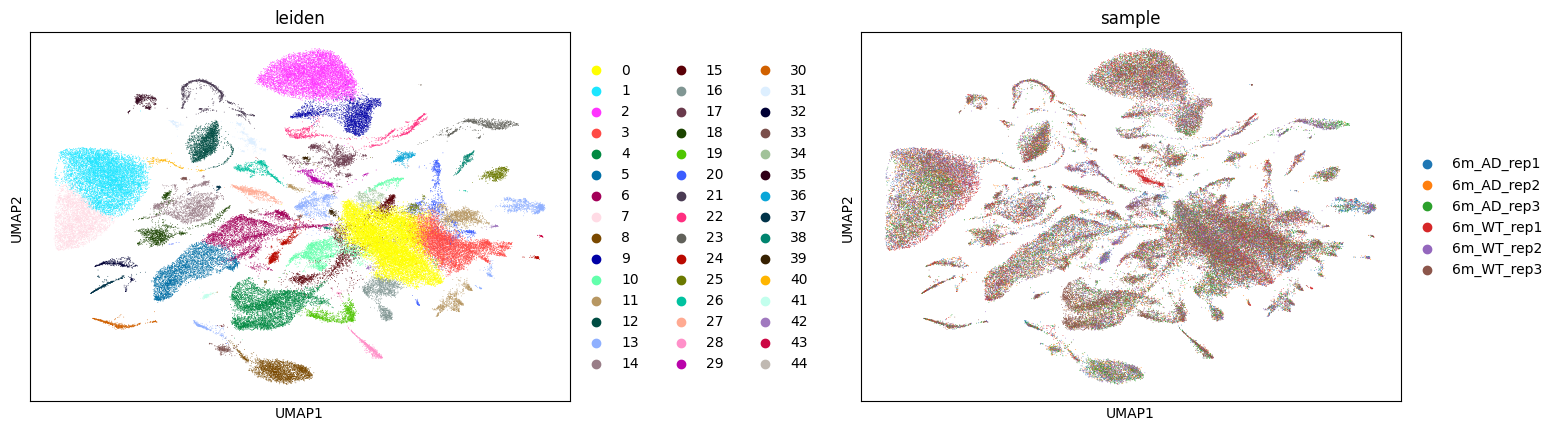

In [8]:
import scanpy as sc

# 1. 提取 6 个月样本（样本名中包含 "6m"）
adata_6m = adata[adata.obs["sample"].str.contains("6m")].copy()
print(f"✔️ 提取 6 个月样本，共 {adata_6m.n_obs} 个细胞，{adata_6m.n_vars} 个基因")

# 2. 标准流程
sc.pp.filter_cells(adata_6m, min_genes=200)
sc.pp.filter_genes(adata_6m, min_cells=3)
adata_6m.var["mt"] = adata_6m.var_names.str.startswith("mt-")  # 线粒体基因（小鼠）

sc.pp.calculate_qc_metrics(adata_6m, qc_vars=["mt"], inplace=True)

# 可选质控筛选
adata_6m = adata_6m[adata_6m.obs["pct_counts_mt"] < 10].copy()

# 3. 预处理
sc.pp.normalize_total(adata_6m, target_sum=1e4)
sc.pp.log1p(adata_6m)
sc.pp.highly_variable_genes(adata_6m, min_mean=0.0125, max_mean=3, min_disp=0.5)

adata_6m = adata_6m[:, adata_6m.var.highly_variable]  # 只保留高变基因
sc.pp.scale(adata_6m, max_value=10)
sc.tl.pca(adata_6m, svd_solver='arpack')

# 4. 聚类 + 可视化
sc.pp.neighbors(adata_6m, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_6m)
sc.tl.leiden(adata_6m, resolution=0.5)

# 5. 画图
sc.pl.umap(adata_6m, color=["leiden", "sample"], wspace=0.4)


In [9]:
adata_6m.save(
		DATA_DIR / "adata_6m.h5ad",
		compression="gzip",  # 压缩保存
)

AttributeError: 'AnnData' object has no attribute 'save'

In [10]:
# save adata_6m to h5ad
save_path = DATA_DIR / "adata_6m.h5ad"
adata_6m.write_h5ad(save_path, compression="gzip")  # 压缩保存
print(f"✔️ 6 个月样本已保存到 {save_path}")


✔️ 6 个月样本已保存到 /Users/zacchan/Downloads/GSE261596_RAW/adata_6m.h5ad


In [2]:
import celltypist
import scanpy as sc
from celltypist import models

models.download_models(force_update = True)
models.models_description()


📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in /Users/zacchan/.celltypist/data/models
💾 Downloading model [1/54]: Immune_All_Low.pkl
💾 Downloading model [2/54]: Immune_All_High.pkl
💾 Downloading model [3/54]: Adult_COVID19_PBMC.pkl
💾 Downloading model [4/54]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [5/54]: Adult_Human_MTG.pkl
💾 Downloading model [6/54]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [7/54]: Adult_Human_PrefrontalCortex.pkl
💾 Downloading model [8/54]: Adult_Human_Skin.pkl
💾 Downloading model [9/54]: Adult_Human_Vascular.pkl
💾 Downloading model [10/54]: Adult_Mouse_Gut.pkl
💾 Downloading model [11/54]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [12/54]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [13/54]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [14/54]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [15/54]: COVID19_HumanChallenge_Bloo

,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_COVID19_PBMC.pkl,peripheral blood mononuclear cell types from C...
3,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
4,Adult_Human_MTG.pkl,cell types and subtypes (10x-based) from the a...
5,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
6,Adult_Human_PrefrontalCortex.pkl,cell types and subtypes from the adult human d...
7,Adult_Human_Skin.pkl,cell types from human healthy adult skin
8,Adult_Human_Vascular.pkl,vascular populations combined from multiple ad...
9,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...


In [3]:
# Indeed, the `model` argument defaults to `Immune_All_Low.pkl`.
model = models.Model.load(model = 'Mouse_Whole_Brain.pkl')

In [4]:
model.cell_types

array(['001 CLA-EPd-CTX Car3 Glut', '002 IT EP-CLA Glut',
       '003 L5/6 IT TPE-ENT Glut', '004 L6 IT CTX Glut',
       '005 L5 IT CTX Glut', '006 L4/5 IT CTX Glut',
       '007 L2/3 IT CTX Glut', '008 L2/3 IT ENT Glut',
       '009 L2/3 IT PIR-ENTl Glut', '010 IT AON-TT-DP Glut',
       '011 L2 IT ENT-po Glut', '012 MEA Slc17a7 Glut',
       '013 COAp Grxcr2 Glut', '014 LA-BLA-BMA-PA Glut',
       '015 ENTmv-PA-COAp Glut', '016 CA1-ProS Glut', '017 CA3 Glut',
       '018 L2 IT PPP-APr Glut', '019 L2/3 IT PPP Glut',
       '020 L2/3 IT RSP Glut', '021 L4 RSP-ACA Glut',
       '022 L5 ET CTX Glut', '023 SUB-ProS Glut', '024 L5 PPP Glut',
       '025 CA2-FC-IG Glut', '026 NLOT Rho Glut', '027 L6b EPd Glut',
       '028 L6b/CT ENT Glut', '029 L6b CTX Glut', '030 L6 CT CTX Glut',
       '031 CT SUB Glut', '032 L5 NP CTX Glut', '033 NP SUB Glut',
       '034 NP PPP Glut', '035 OB Eomes Ms4a15 Glut', '036 HPF CR Glut',
       '037 DG Glut', '038 DG-PIR Ex IMN', '039 OB Meis2 Thsd7b Gaba',


In [33]:
import scanpy as sc
from pathlib import Path
import celltypist
from celltypist import models
import pandas as pd
import numpy as np

# -----------------------------------------------------------
# 0️⃣  从上一步得到的 adata_6m 开始
# -----------------------------------------------------------

# 若你关闭了 notebook，可重新载入 6m 对象
adata_6m = sc.read_h5ad("adata_6m.h5ad")



In [23]:
# 检查normalize后的数据是否有负值或NaN

# 在normalize后立即检查
print(f"normalize后有负值: {np.any(adata_6m.X < 0)}")
print(f"normalize后有NaN: {np.isnan(adata_6m.X).sum()}")

# 如果有负值，可以尝试将其设为0
if np.any(adata_6m.X < 0):
    adata_6m.X[adata_6m.X < 0] = 0
    
# log1p后再次检查
after_log = np.log1p(adata_6m.X)
print(f"log1p后有NaN: {np.isnan(after_log).sum()}")

normalize后有负值: True
normalize后有NaN: 0
log1p后有NaN: 0


In [15]:
import numpy as np
import scipy
# Check for NaN values in adata_6m.X

# Convert to dense array temporarily if it's a sparse matrix
if scipy.sparse.issparse(adata_6m.X):
	has_nan = np.isnan(adata_6m.X.data).sum() > 0
	print(f"Number of NaN values in sparse matrix: {np.isnan(adata_6m.X.data).sum()}")
else:
	has_nan = np.isnan(adata_6m.X).sum() > 0
	print(f"Number of NaN values in dense matrix: {np.isnan(adata_6m.X).sum()}")

# Replace NaN values with zeros if any are found
if has_nan:
	print("Replacing NaN values with zeros...")
	if scipy.sparse.issparse(adata_6m.X):
		adata_6m.X.data[np.isnan(adata_6m.X.data)] = 0
	else:
		adata_6m.X[np.isnan(adata_6m.X)] = 0
	print("✅ NaN values have been replaced with zeros")
else:
	print("✅ No NaN values found in the expression matrix")


Number of NaN values in dense matrix: 0
✅ No NaN values found in the expression matrix


In [28]:
# 需要标准化
sc.pp.log1p(adata_6m)
sc.pp.normalize_total(adata_6m, target_sum=1e4)

In [30]:
#  先进行log1p转换，再normalize
import scanpy as sc
import numpy as np

# 备份原始数据
adata_copy = adata_6m.copy()

# 1. 先做log1p
sc.pp.log1p(adata_copy)

# 2. 再normalize
sc.pp.normalize_total(adata_copy)

# 检查结果
print(f"有NaN: {np.isnan(adata_copy.X).sum()}")

有NaN: 0


In [37]:
adata_6m.X

array([[-0.0641379 , -0.03659685, -0.6238365 , ..., -0.14618279,
        -0.3632667 , -0.27166012],
       [-0.0641379 , -0.03659685, -0.6238365 , ..., -0.14618279,
        -0.3632667 , -0.27166012],
       [-0.0641379 , -0.03659685,  1.0652894 , ..., -0.14618279,
         2.469006  , -0.27166012],
       ...,
       [-0.0641379 , -0.03659685, -0.6238365 , ..., -0.14618279,
        -0.3632667 , -0.27166012],
       [-0.0641379 , -0.03659685,  1.7378932 , ..., -0.14618279,
        -0.3632667 , -0.27166012],
       [-0.0641379 , -0.03659685, -0.06908023, ..., -0.14618279,
         0.566931  , -0.27166012]], dtype=float32)

In [ ]:

# -----------------------------------------------------------
# 1️⃣  CellTypist 自动标注
# -----------------------------------------------------------
predictions1 = celltypist.annotate(adata_copy, model = 'Mouse_Whole_Brain.pkl', majority_voting = True)

ValueError: 🛑 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell

In [ ]:

print("▶️  运行 CellTypist 进行注释 ...")
ct_pred = celltypist.annotate(
    adata_6m, 
    model = brain_model, 
    majority_voting = True,      # 更稳的投票模式
    verbose = True
)

# 把预测标签存进 .obs
adata_6m.obs['cell_type'] = ct_pred.predicted_labels
print("✔️  CellTypist 注释完成！可通过 adata_6m.obs['cell_type'].value_counts() 查看分布")



In [ ]:

# -----------------------------------------------------------
# 2️⃣  提取小胶质细胞并重聚类
# -----------------------------------------------------------
micro = adata_6m[adata_6m.obs['cell_type'].str.contains('Microglia'), :].copy()
print(f"✔️  提取到 {micro.n_obs} 个小胶质细胞")

# —— 常规预处理（只对 micro 再来一次）——
sc.pp.highly_variable_genes(micro, min_mean=0.0125, max_mean=3, min_disp=0.5)
micro = micro[:, micro.var.highly_variable]
sc.pp.scale(micro, max_value=10)
sc.tl.pca(micro, svd_solver='arpack')

sc.pp.neighbors(micro, n_neighbors=10, n_pcs=30)
sc.tl.umap(micro)
sc.tl.leiden(micro, resolution=0.6)

# 可视化
sc.pl.umap(micro, color=['leiden', 'sample'], wspace=0.4)

# -----------------------------------------------------------
# 3️⃣  构建 AD / WT 分组标签
# -----------------------------------------------------------
def map_group(sample):
    return 'AD' if '_AD_' in sample else 'WT'

micro.obs['group'] = micro.obs['sample'].map(map_group).astype('category')
print(micro.obs['group'].value_counts())

# -----------------------------------------------------------
# 4️⃣  全局 AD vs WT 差异表达（所有小胶质细胞）
# -----------------------------------------------------------
sc.tl.rank_genes_groups(
    micro, 
    groupby='group', 
    groups=['AD'], 
    reference='WT', 
    method='wilcoxon', 
    key_added='DE_all_micro'
)
sc.pl.rank_genes_groups(micro, key='DE_all_micro', n_genes=20, sharey=False)

# -----------------------------------------------------------
# 5️⃣  每个小胶质亚群内的 AD vs WT
# -----------------------------------------------------------
for cl in micro.obs['leiden'].cat.categories:
    key = f'DE_micro_cl{cl}'
    sc.tl.rank_genes_groups(
        micro[micro.obs['leiden'] == cl], 
        groupby='group',
        groups=['AD'], 
        reference='WT', 
        method='wilcoxon',
        key_added=key
    )
    sc.pl.rank_genes_groups(
        micro[micro.obs['leiden'] == cl], 
        key=key, 
        n_genes=15, 
        title=f'Cluster {cl}  AD vs WT',
        sharey=False
    )

# -----------------------------------------------------------
# 6️⃣  导出差异基因表（可选）
# -----------------------------------------------------------
# 示例：导出全局差异基因 top 50
de_all = sc.get.rank_genes_groups_df(micro, key='DE_all_micro', n_genes=50)
de_all.to_csv('DE_micro_AD_vs_WT_top50.csv', index=False)
print("📑 已保存差异基因表：DE_micro_AD_vs_WT_top50.csv")